# PART 3 - Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Import du dataset

In [2]:
with open('data/part2.pkl', 'rb') as f:
    my_unpickler = pickle.Unpickler(f)
    df = my_unpickler.load()
    
df.head(10)

,length,margin_up,margin_low,height_left,height_right,diagonal,is_genuine
0,112.83,2.89,4.52,104.86,104.95,171.81,True
1,113.29,2.87,4.01,103.74,103.70,171.67,True
2,113.84,2.88,4.40,103.76,103.76,171.83,True
3,113.63,3.12,3.73,103.78,103.65,171.80,True
4,113.55,2.27,5.04,103.70,103.75,172.05,True
5,113.16,2.99,4.54,104.65,104.44,172.57,True
6,113.30,2.90,3.97,103.55,103.80,172.38,True
7,113.38,3.19,3.54,103.65,103.37,171.58,True
8,113.53,3.33,4.06,103.51,103.75,171.96,True
9,112.47,3.02,4.63,104.34,104.20,172.14,True


# Classification Kmeans

In [3]:
data = df.drop('is_genuine', axis=True).copy()
X = data.values

# All data are in the same unity (milimeters) so we don't need to scale
# Toutes les données sont dans la même unité (mm), pas besoin de les mettre à l'échelle
km = KMeans(n_clusters=2) # 2 clusters (Vrai billet VS faux billet)
km.fit(X)
clusters = km.labels_

data['km cluster'] = clusters

# Projection sur le plan factoriel de l'ACP

In [4]:
# Séparation de 'is_genuine'
y = data.loc[:,['km cluster']].values
# Standardisation des features
x = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['F1', 'F2'])

finalDf = pd.concat([principalDf, data[['km cluster']]], axis = 1)

finalDf.head(10)

,F1,F2,km cluster
0,2.153639,1.599709,0
1,-2.110416,-0.526039,0
2,-1.973152,-0.048102,0
3,-2.059795,-0.089105,0
4,-2.403180,0.412170,0
5,1.235656,2.983191,0
6,-2.079412,1.147980,0
7,-2.623934,-1.040133,0
8,-1.736309,-0.227631,0
9,0.727490,1.063881,0


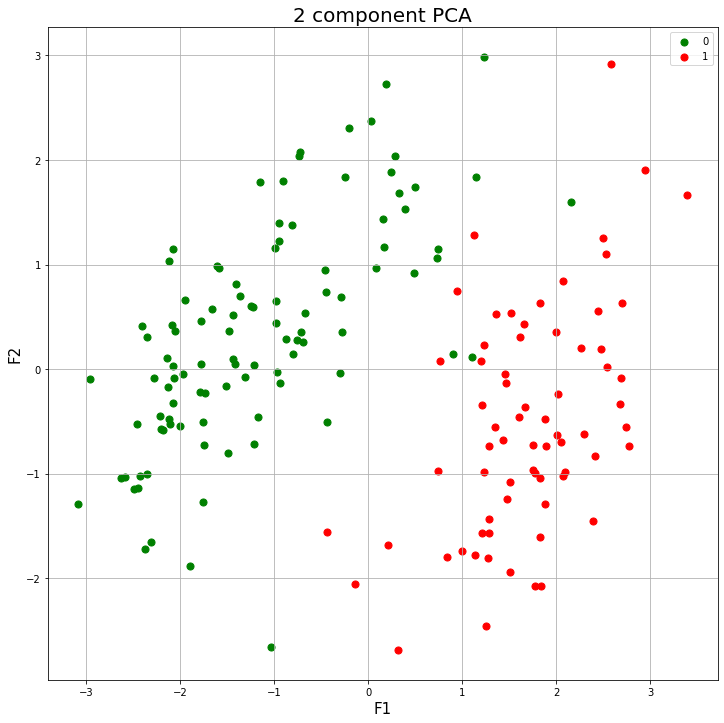

In [5]:
# Projection sur le plan factoriel
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('F1', fontsize = 15)
ax.set_ylabel('F2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['km cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'F1']
               , finalDf.loc[indicesToKeep, 'F2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Vérification de la justesse de la classification
### Préparation des données

In [6]:
# Inversion 1 et 0
test_clusters = pd.Series(clusters).apply(lambda x: x == 0) * 1

# Récupération des valeurs de "is genuine"
test_genuine = df['is_genuine'].copy()

# Création du dataframe
df_test = pd.concat([test_clusters, test_genuine], axis=1)

# Création d'un colonne comparant les cluster kmeans avec is_genuine
df_test['result'] = df_test[0] == df_test['is_genuine']

### Test de vérification

In [7]:
len_test = len(df_test)
len_true = len(df_test[df_test['result'] == True])
len_ratio = len_true / len_test

display(df_test)

print(f"Success Rate: {len_true} ({len_ratio:.2%})")

,0,is_genuine,result
0,1,True,True
1,1,True,True
2,1,True,True
3,1,True,True
4,1,True,True
...,...,...,...
165,0,False,True
166,0,False,True
167,0,False,True
168,0,False,True


Success Rate: 167 (98.24%)


# Sauvegarde du jeu de données

In [8]:
finalDF = pd.concat([df, finalDf], axis=1)

with open('data/part3.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(finalDF)
    
finalDF

,length,margin_up,margin_low,height_left,height_right,diagonal,is_genuine,F1,F2,km cluster
0,112.83,2.89,4.52,104.86,104.95,171.81,True,2.153639,1.599709,0
1,113.29,2.87,4.01,103.74,103.70,171.67,True,-2.110416,-0.526039,0
2,113.84,2.88,4.40,103.76,103.76,171.83,True,-1.973152,-0.048102,0
3,113.63,3.12,3.73,103.78,103.65,171.80,True,-2.059795,-0.089105,0
4,113.55,2.27,5.04,103.70,103.75,172.05,True,-2.403180,0.412170,0
...,...,...,...,...,...,...,...,...,...,...
165,111.78,3.58,5.24,104.23,104.45,172.11,False,2.478626,0.189974,1
166,110.91,3.05,5.04,104.59,104.31,173.01,False,2.585331,2.914472,1
167,110.68,3.33,4.88,104.27,104.10,172.47,False,2.067245,0.845602,1
168,111.87,3.55,4.73,103.97,103.88,171.82,False,0.739257,-0.972965,1
